In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/'
                 'housing/housing.data',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.shape

(506, 14)

In [4]:
import seaborn as sns

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [5]:
sns.set(style='whitegrid', context='notebook')

C:\Users\Steve\Anaconda2\envs\dato-env\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


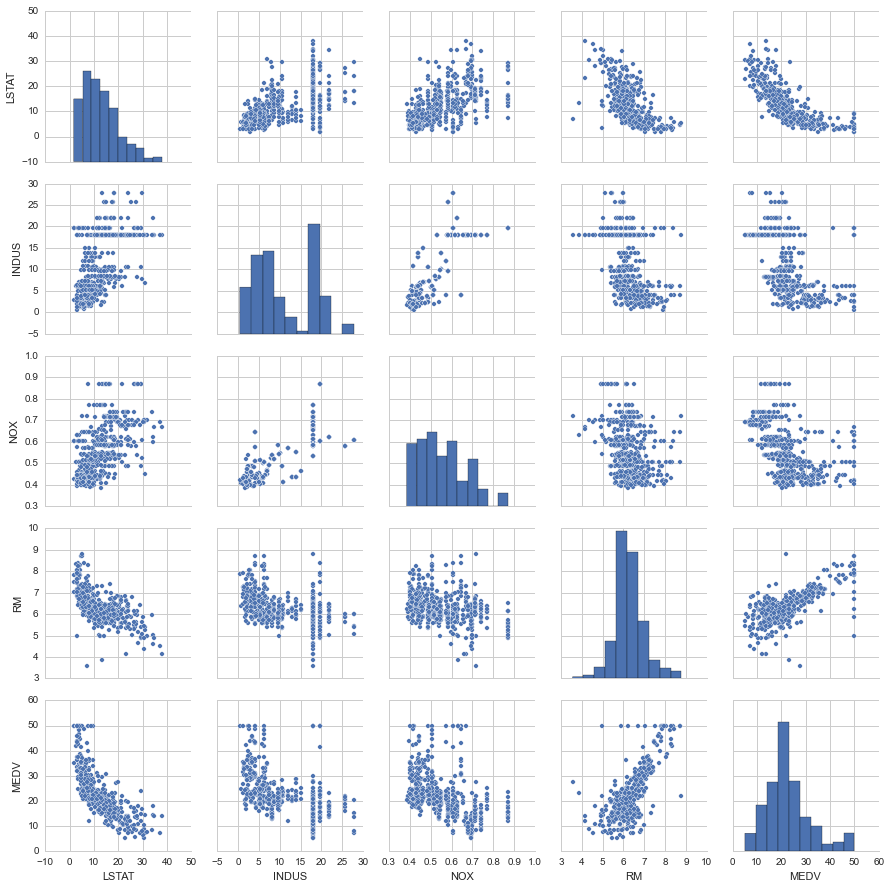

In [6]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], size=2.5)

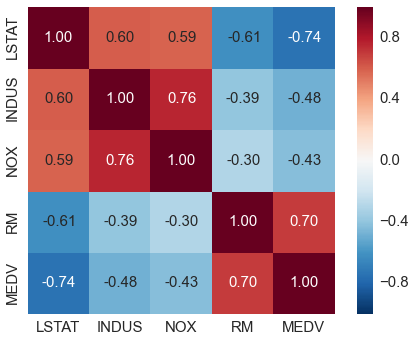

In [7]:
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='0.2f', annot_kws={'size':15}, yticklabels=cols, xticklabels=cols)

In [51]:
class LinearRegressionGD(object):

    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            output = output.reshape(-1, 1)
            errors = (y - output)
            self.w_[1:] +=  self.eta*X.T.dot(errors)[0, 0] #get value as number to avoid broadcast error
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

In [9]:
from sklearn.preprocessing import StandardScaler

In [54]:
X= df[['RM']].values
y = df[['MEDV']].values
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

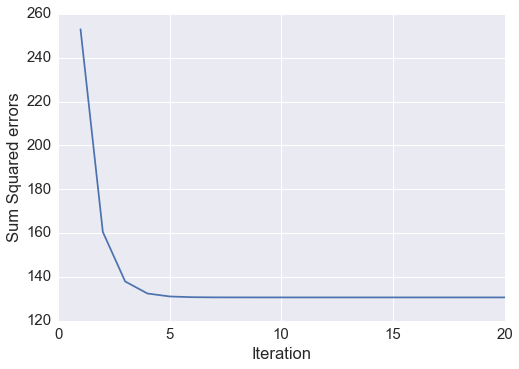

In [56]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.xlabel("Iteration")
plt.ylabel("Sum Squared errors")

In [57]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red')

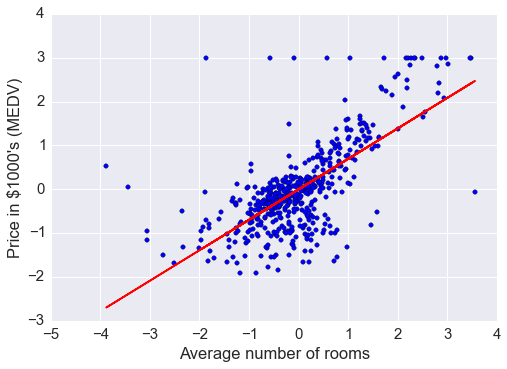

In [59]:
lin_regplot(X_std, y_std, lr)
plt.xlabel("Average number of rooms")
plt.ylabel("Price in $1000's (MEDV)")

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
slr = LinearRegression()
slr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [63]:
print "Slope:", slr.coef_[0]
print 'Intercept:', slr.intercept_

Slope: [ 9.10210898]
Intercept: [-34.67062078]


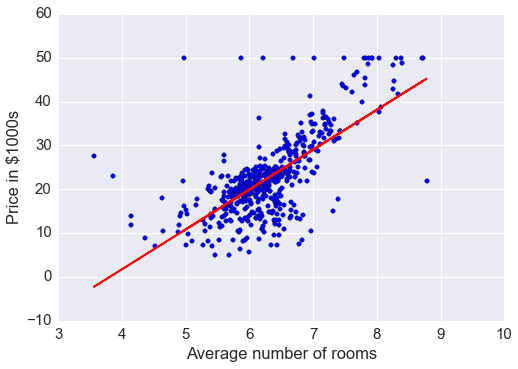

In [65]:
lin_regplot(X, y, slr)
plt.xlabel("Average number of rooms")
plt.ylabel("Price in $1000s")

In [66]:
from sklearn.linear_model import RANSACRegressor

In [67]:
ransac = RANSACRegressor(LinearRegression(), max_trials=100, min_samples=50, residual_metric=lambda x: np.sum(np.abs(x), axis=1),
                        residual_threshold=5.0, random_state=0)
ransac.fit(X, y)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, max_trials=100,
        min_samples=50, random_state=0,
        residual_metric=<function <lambda> at 0x000000001142F2E8>,
        residual_threshold=5.0, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

In [68]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])

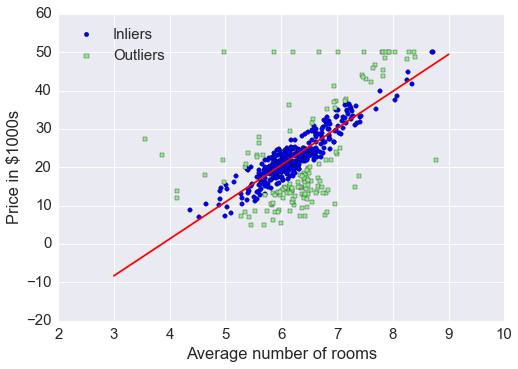

In [70]:
plt.scatter(X[inlier_mask], y[inlier_mask], c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], c='lightgreen', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('Average number of rooms')
plt.ylabel("Price in $1000s")
plt.legend(loc='upper left')

In [71]:
from sklearn.cross_validation import train_test_split

In [72]:
X = df.iloc[:, :-1].values
y = df['MEDV'].values
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=0)
slr = LinearRegression()
slr.fit(xtrain, ytrain)
ytrain_pred = slr.predict(xtrain)
ytest_pred = slr.predict(xtest)

(-10, 50)

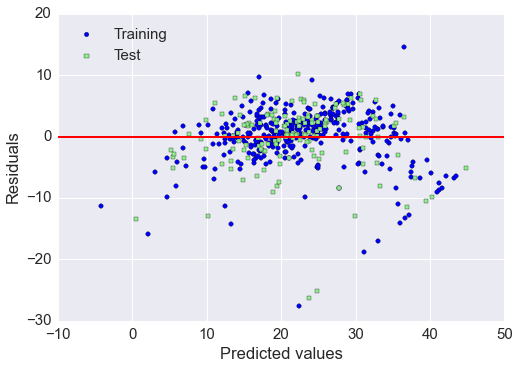

In [75]:
plt.scatter(ytrain_pred, ytrain_pred-ytrain, c='blue', marker='o', label='Training')
plt.scatter(ytest_pred, ytest_pred-ytest, c='lightgreen', marker='s', label='Test')
plt.xlabel("Predicted values")
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])

In [76]:
from sklearn.metrics import mean_squared_error

In [78]:
print "Training MSE: %0.2f, Test MSE: %0.2f" %(mean_squared_error(ytrain_pred, ytrain), 
                                              mean_squared_error(ytest_pred, ytest))

Training MSE: 19.96, Test MSE: 27.20


In [79]:
from sklearn.metrics import r2_score

In [81]:
print "R2 train: %0.4f test: %0.4f" %(r2_score(ytrain, ytrain_pred), r2_score(ytest, ytest_pred))

R2 train: 0.7645 test: 0.6734


In [82]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [83]:
from sklearn.preprocessing import PolynomialFeatures

In [84]:
X = np.array([258.0, 270.0, 294.0, 
              320.0, 342.0, 368.0, 
              396.0, 446.0, 480.0, 586.0])[:, np.newaxis]

y = np.array([236.4, 234.4, 252.8, 
              298.6, 314.2, 342.2, 
              360.8, 368.0, 391.2,
              390.8])

In [85]:
lr = LinearRegression()
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

In [86]:
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

In [87]:
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

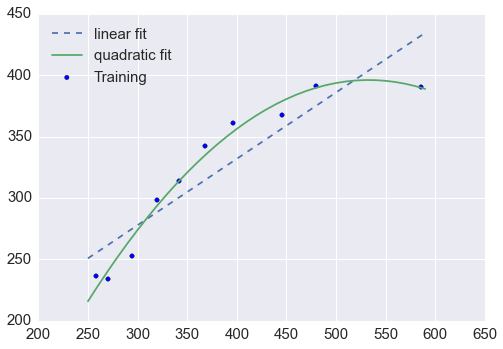

In [89]:
plt.scatter(X, y, label='Training')
plt.plot(X_fit, y_lin_fit, label='linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='quadratic fit')
plt.legend(loc='upper left')

In [91]:
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)
print 'Training MSE linear: %0.4f, quadratic: %0.4f' %(mean_squared_error(y, y_lin_pred), mean_squared_error(y, y_quad_pred))

Training MSE linear: 569.7797, quadratic: 61.3302


In [92]:
print "Training R2 linear: %0.4f, quadratic %0.4f" %(r2_score(y, y_lin_pred), r2_score(y, y_quad_pred))

Training R2 linear: 0.8317, quadratic 0.9819


In [93]:
X = df[['LSTAT']].values
y = df[['MEDV']].values
regr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

In [94]:
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

In [95]:
#quadratic model
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

In [96]:
#cubic model
regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

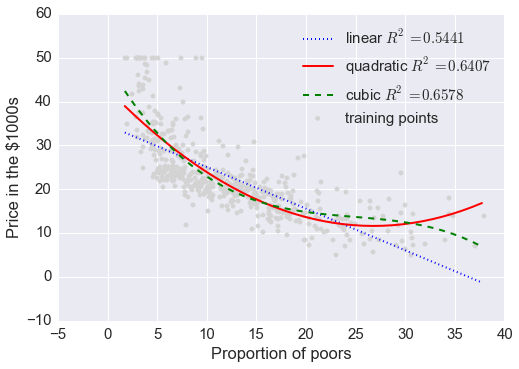

In [100]:
plt.scatter(X, y, label='training points', color='lightgray')
plt.plot(X_fit, y_lin_fit, label='linear $R^2=%0.4f$' %linear_r2, color='blue', lw=2, linestyle=':')
plt.plot(X_fit, y_quad_fit, label='quadratic $R^2=%0.4f$' %quadratic_r2, color='red', lw=2, linestyle='-')
plt.plot(X_fit, y_cubic_fit, label='cubic $R^2=%0.4f$' %cubic_r2, color='green', lw=2, linestyle='--')
plt.xlabel("Proportion of poors")
plt.ylabel("Price in the $1000s")
plt.legend()

In [102]:
X_log = np.log(X)
y_sqrt = np.sqrt(y)

In [103]:
X_fit = np.arange(X_log.min()-1, X_log.max()+1, 1)[:, np.newaxis]
regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

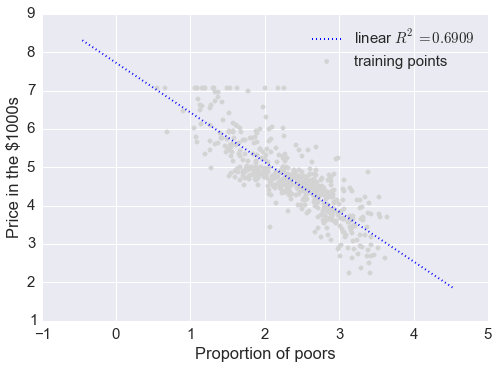

In [105]:
plt.scatter(X_log, y_sqrt, label='training points', color='lightgray')
plt.plot(X_fit, y_lin_fit, label='linear $R^2=%0.4f$' %linear_r2, color='blue', lw=2, linestyle=':')
plt.xlabel("Proportion of poors")
plt.ylabel("Price in the $1000s")
plt.legend()

In [106]:
from sklearn.tree import DecisionTreeRegressor

In [107]:
X = df[['LSTAT']].values
y = df[['MEDV']].values
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, random_state=None,
           splitter='best')

In [108]:
sort_idx = X.flatten().argsort()

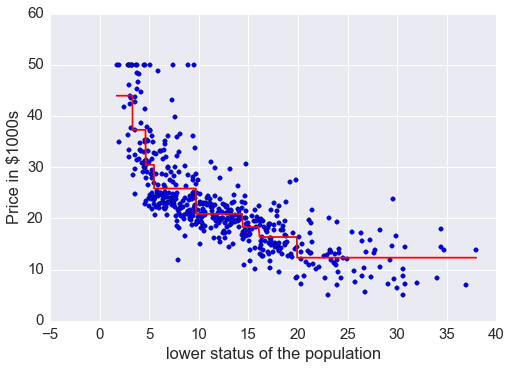

In [109]:
lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('lower status of the population')
plt.ylabel('Price in $1000s')

In [110]:
X = df.iloc[:, :-1].values
y = df['MEDV'].values
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.4, random_state=1)

In [111]:
from sklearn.ensemble import RandomForestRegressor

In [112]:
forest = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=1)
forest.fit(xtrain, ytrain)
ytrain_pred = forest.predict(xtrain)
ytest_pred = forest.predict(xtest)

In [115]:
print 'MSE train: %0.4f, test: %0.4f' %(mean_squared_error(ytrain, ytrain_pred), mean_squared_error(ytest, ytest_pred))
print 'R2 train: %0.4f, test: %0.4f' %(r2_score(ytrain, ytrain_pred), r2_score(ytest, ytest_pred))

MSE train: 1.6300, test: 11.0647
R2 train: 0.9796, test: 0.8775


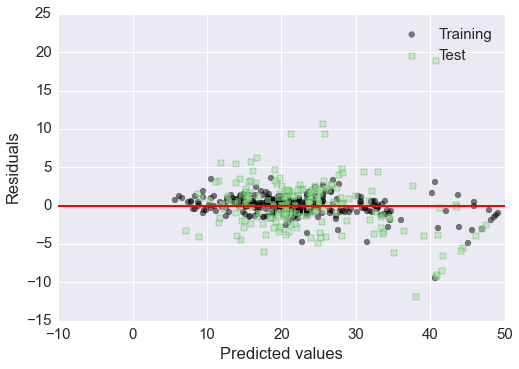

In [117]:
plt.scatter(ytrain_pred, ytrain_pred-ytrain, c='black', marker='o', s=35, alpha=0.5, label='Training')
plt.scatter(ytest_pred, ytest_pred-ytest, c='lightgreen', marker='s', s=35, alpha=0.5, label='Test')
plt.xlabel('Predicted values')
plt.xlim([-10, 50])
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.ylabel('Residuals')
plt.legend()